In [1]:
import tensorflow as tf
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense , Dropout,Activation ,Flatten,Conv2D,MaxPool2D
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle as pk
import numpy as np
import cv2
import os

/home/mjs/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mjs/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mjs/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mjs/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarnin

In [2]:
x=np.load('/media/mjs/New Volume/datasets/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy','r')
y=np.load('/media/mjs/New Volume/datasets/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy','r')

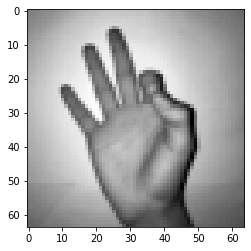

In [3]:
plt.imshow(x[10],cmap='gray')

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)
x_train/=255.0
x_test/=255.0
x_train=x_train.reshape(x_train.shape[0],64,64,1)
x_test=x_test.reshape(x_test.shape[0],64,64,1)

In [5]:
model=Sequential()

model.add(Conv2D(64,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPool2D(strides=(2,2)))
model.add(Conv2D(64,kernel_size=3,padding="same", activation="relu",input_shape=(None,3,64,64)))
model.add(MaxPool2D(strides=(2,2)))
model.add(Flatten())
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


model.fit(x_train,y_train,batch_size=32,epochs=10)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
1443/1443 [==============================] - 6s 4ms/sample - loss: 0.3251 - acc: 0.9000
Epoch 2/10
1443/1443 [==============================] - 6s 4ms/sample - loss: 0.3251 - acc: 0.9000
Epoch 3/10
1443/1443 [==============================] - 6s 4ms/sample - loss: 0.3251 - acc: 0.9000
Epoch 4/10
1443/1443 [==============================] - 6s 4ms/sample - loss: 0.3251 - acc: 0.9000
Epoch 5/10
1443/1443 [==============================] - 6s 4ms/sample - loss: 0.3251 - acc: 0.9000
Epoch 6/10
1443/1443 [==============================] - 6s 4ms/sample - loss: 0.3251 - acc: 0.9000
Epoch 7/10
1443/1443 [==============================] - 6s 4ms/sample - loss: 0.3251 - acc: 0.9000
Epoch 8/10
1443/1443 [==============================] - 6s 4ms/sample - loss: 0.3251 - acc: 0.9

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  163850    
Total params: 201,418
Trainable params: 201,418
Non-trainable params: 0
__________________________________________________

In [7]:
model.evaluate(x_test,y_test)

619/619 [==============================] - 1s 1ms/sample - loss: 0.3252 - acc: 0.9000


[0.32522794060252597, 0.89999986]